# 1.0 Load Dependencies

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

import joblib

import warnings
warnings.filterwarnings('ignore')

# 2.0 Load Data

In [2]:
data = pd.read_csv(r'final_result.csv')

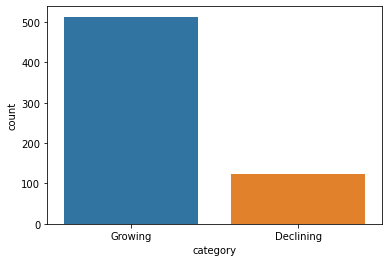

In [6]:
#from total, there are 513 influencers that will be predicted to be growing in the july and 123 that will be declining
sns.countplot(data['category']);

In [8]:
data['category'].value_counts()

Growing      513
Declining    123
Name: category, dtype: int64

# 3.0 Load Model

In [20]:
feature = ['n_post', 'n_post_01', 'n_img_post', 'avg_likes', 'avg_likes_01', 'avg_likes_02',
          'avg_likes_03', 'sum_capt_wo_punct', 'sum_n_words', 'sum_avg_char_words', 'sum_likes_engagement',
          'sum_total_engagement', 'avg_likes_engagement', 'avg_total_engagement', 'avg_total_engagement_01',
          'avg_total_engagement_02', 'avg_total_engagement_03']

In [12]:
model = joblib.load('best_model_rf.pkl')

In [13]:
model.feature_importances_

array([0.00516424, 0.00501836, 0.00336304, 0.05856386, 0.02320785,
       0.015767  , 0.00927532, 0.00627953, 0.00614053, 0.00712573,
       0.01366494, 0.0148853 , 0.26968161, 0.26332307, 0.14301201,
       0.09435881, 0.06116881])

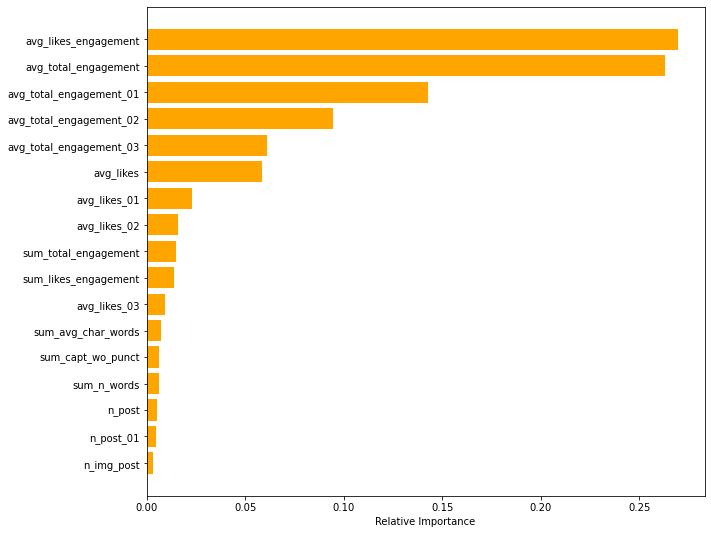

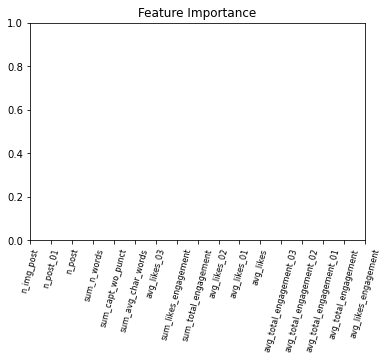

In [32]:
# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]

# Barplot: Add bars
plt.figure(figsize=(10,9))

plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Add feature names as x-axis labels
plt.xticks(range(17), names, rotation=75, fontsize = 8)

# Create plot title
plt.title("Feature Importance")

# Show plot
plt.show()